In [1]:
%load_ext autoreload
%autoreload 2

# Augmentation

In [2]:
import pathlib

import cdmetadl.helpers.general_helpers
import cdmetadl.dataset

path_to_dataset = "/fastdata/vilab24/meta-album"

dataset_path = pathlib.Path(path_to_dataset)
dataset_info_dict = cdmetadl.helpers.general_helpers.check_datasets(dataset_path, ["SPT"])

dataset = cdmetadl.dataset.ImageDataset("Sports", dataset_info_dict["SPT"])
device = cdmetadl.helpers.general_helpers.get_device()

In [3]:
import cdmetadl.samplers

n_way_sampler = cdmetadl.samplers.ValueSampler(value=5)
k_shot_sampler = cdmetadl.samplers.ValueSampler(value=4)

task = dataset.generate_task(n_way_sampler, k_shot_sampler, query_size=4)

## Standard Augmentation

/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_5m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/fastdata/vilab25/cd-metadl-cyLvmR8c-py3.11/lib/python3.11/site-packages/controlnet_aux/segment_anything/modeling/tiny_vit_sam.py:654: UserWarning: Overwriting tiny_vit_11m_224 in registry with controlnet_aux.segment_anything.modeling.tiny_vit_sam.tiny_vit_11m_224. This is becau

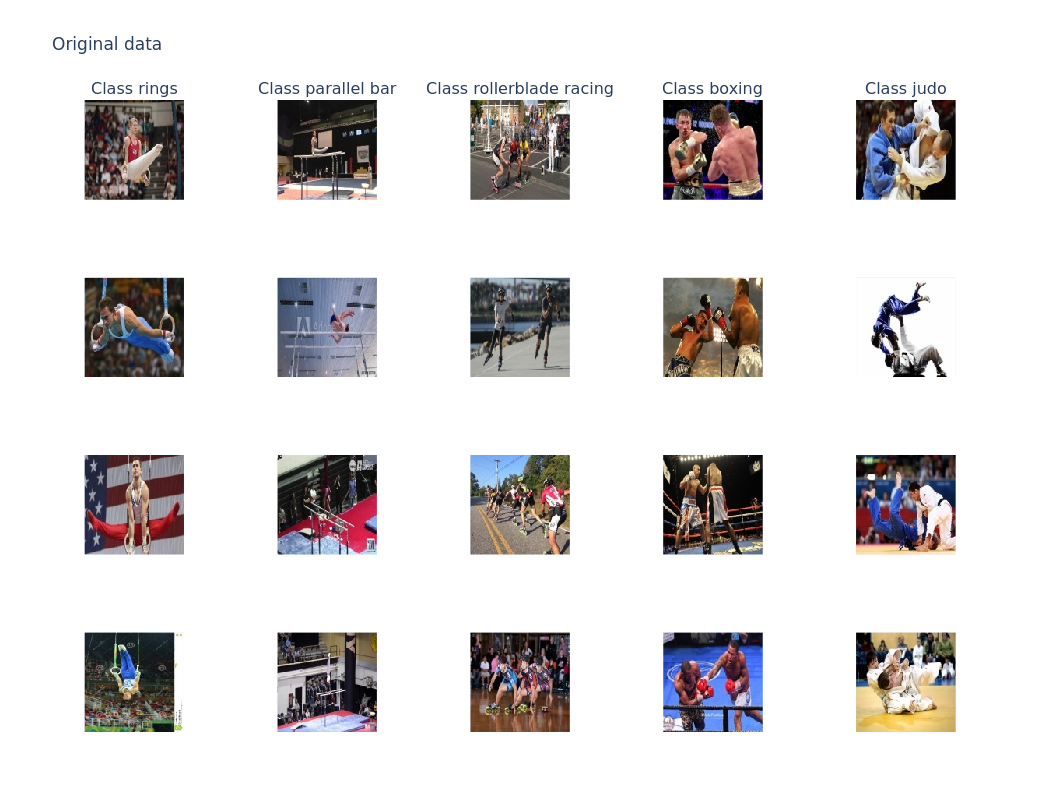

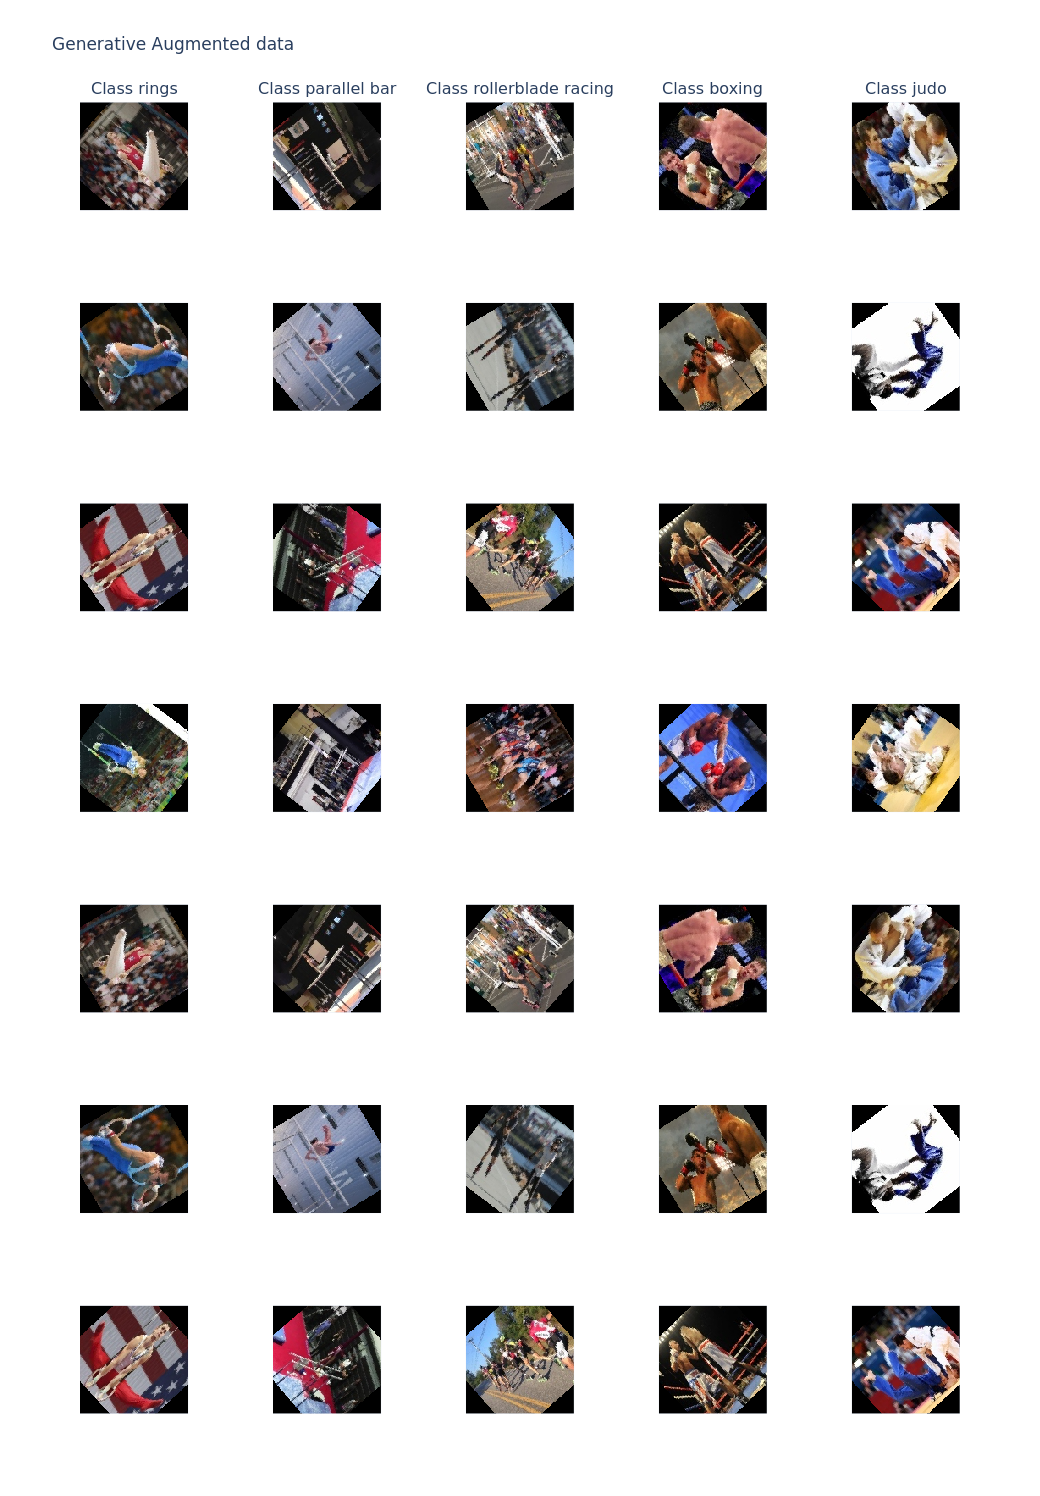

SetData(images=tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0.

In [4]:
import cdmetadl.augmentation
from cdmetadl.notebooks.helpers import create_plot

standard_augmentor = cdmetadl.augmentation.StandardAugmentation(
    augmentation_size={
        "scale": 1,
        "threshold": 0.75,
        "maximum": 20,
        "offset": 3
    }, keep_original_data=False, device=device
)
create_plot(standard_augmentor, task, conf_scores=[0.0, 0.0, 0.0, 0.0, 0.0])

## Pseudo Augmenation

In [5]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

pseudo_augmentor = cdmetadl.augmentation.PseudoAugmentation(threshold=0.75, scale=1.0, keep_original_data=False)
create_plot(pseudo_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])

TypeError: PseudoAugmentation.__init__() got an unexpected keyword argument 'threshold'

## Generative Augmentation

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

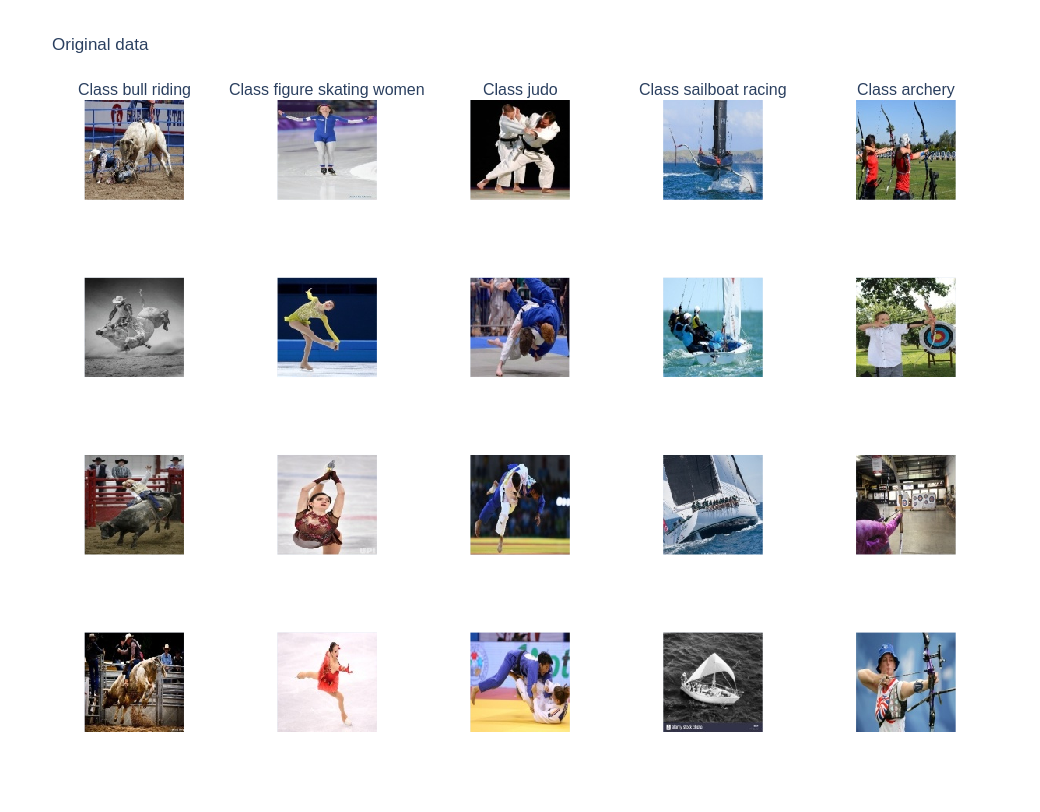

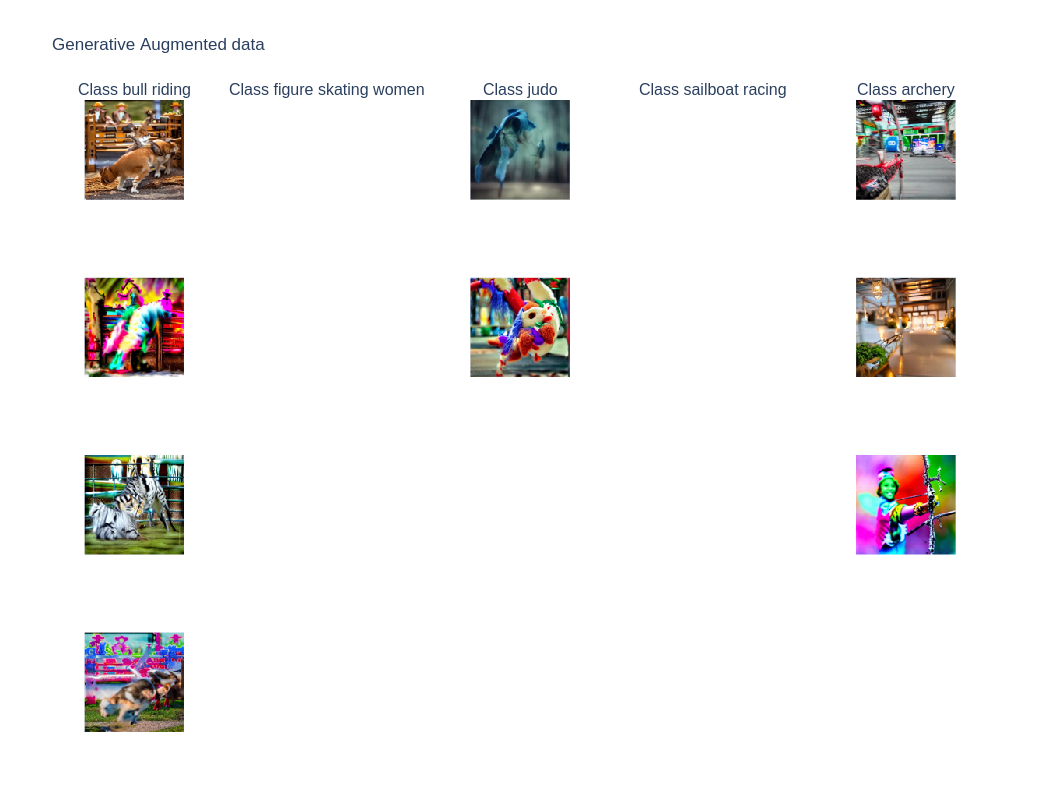

In [ ]:
import cdmetadl.augmentation
import cdmetadl.notebooks.helpers

generative_augmentor = cdmetadl.augmentation.GenerativeAugmentation(threshold=0.75, scale=1.0, keep_original_data=False, annotator_type="hed")
create_plot(generative_augmentor, task, conf_scores=[0.0, 1.0, 0.5, 0.75, 0.3])